course: https://learn.deeplearning.ai/courses/pytorch-fundamentals/

lesson: https://learn.deeplearning.ai/specializations/pytorch-for-deep-learning-professional-certificate/lesson/466v5tii/building-a-simple-neural-network

based off of lab: https://learn.deeplearning.ai/specializations/pytorch-for-deep-learning-professional-certificate/lesson/466v5tii/building-a-simple-neural-network


LESSON CONCEPTS
Machine Learning Pipeline
+
Linear Modeling


problem:
Time to prepare your delivery data for training. In the ML pipeline, this combines two stages: Data Ingestion (gathering raw data) and Data Preparation (cleaning it up). In more realistic projects, you'd pull delivery logs from a data source and fix errors or missing values. For this lab, that work is already done, but with a twist. This isn't the same data from the lecture videos. You're looking at a different set of deliveries, which means your model might find a different pattern and make a different prediction for that 7-mile delivery.

Define the two essential tensors for your task:
The distances tensor contains how far you biked for four recent deliveries (in miles). INPUT
The times tensor shows how long each delivery took (in minutes). OUTPUT
dtype=torch.float32 sets your data type to 32-bit floating point values for precise calculations.

In [12]:
# Imports

import torch
import torch.nn as nn   # neural network
import torch.optim as optim # optimization algorithms

import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Stage 1: Data Ingestion 
# Stage 2: Data Preparation

# assume data is already loaded, cleaned, and transformed
# training data
distances_data = [
    [1.0], 
    [2.0], 
    [3.0], 
    [4.0]
]
delivery_times_data = [
    [6.96],
    [12.11],
    [16.77],
    [22.21]
]

distances_tensor = torch.tensor(
    distances_data,
    dtype=torch.float32
)
delivery_times_tensor = torch.tensor(
    delivery_times_data,
    dtype=torch.float32
)

In [ ]:
# Stage 3: Model Building
# use linear regression model

torch.manual_seed(42)   # ensures results are reproducible

# define model
# model: linear model (y = Wx + b) -> delivery_time = weight * distance + bias 
model = nn.Sequential(
    nn.Linear(
        in_features=1, # one input feature: distance
        out_features=1  # one output feature: delivery time
    )
)

# define loss function and optimizer
loss_function = nn.MSELoss() # mean squared error loss
optimizer = optim.SGD(
    model.parameters(), # parameters to optimize (W, b)
    lr=0.01 # learning rate
)

In [5]:
# Stage 4: Training

# training loop
NUM_EPOCHS = 1000
for epoch in range(NUM_EPOCHS):
    # reset optimizer's gradients
    # prevent accumulation of gradients from previous iterations
    optimizer.zero_grad()
    
    # forward pass
    # make predictions on training data
    # usually initializes parameters to random values
    predicted_outputs = model(distances_tensor)

    # compute loss
    # calculates how wrong predicted outputs are compared with actual output from training data
    loss = loss_function(
        predicted_outputs, 
        delivery_times_tensor
    )

    # backpropagation (backward pass)
    # calculate adjustments to the parameters (W, b) using gradient descent to optimize loss function
    loss.backward()

    # Update the model's parameters
    optimizer.step()

    # print progress every 50 epochs
    if (epoch + 1) % 50 == 0:
        print(f"epoch {epoch + 1}: Loss = {loss.item()}")    

epoch 50: Loss = 0.044686220586299896
epoch 100: Loss = 0.039690908044576645
epoch 150: Loss = 0.03599324822425842
epoch 200: Loss = 0.03325353190302849
epoch 250: Loss = 0.031223393976688385
epoch 300: Loss = 0.029719408601522446
epoch 350: Loss = 0.028604814782738686
epoch 400: Loss = 0.02777894400060177
epoch 450: Loss = 0.027167148888111115
epoch 500: Loss = 0.02671385183930397
epoch 550: Loss = 0.026377927511930466
epoch 600: Loss = 0.02612912282347679
epoch 650: Loss = 0.025944795459508896
epoch 700: Loss = 0.025808047503232956
epoch 750: Loss = 0.025706768035888672
epoch 800: Loss = 0.025631817057728767
epoch 850: Loss = 0.025576306506991386
epoch 900: Loss = 0.025535130873322487
epoch 950: Loss = 0.025504693388938904
epoch 1000: Loss = 0.025482146069407463


In [23]:
# Stage 4: Training

# Visualize training results

# helper function to plot results
def plot_results(
        model,
        input_tensor,
        output_tensor
):
    """
    Plots the model predictions against the actual data.

    Args:
        model: The trained PyTorch model.
        input_tensor: The input tensor (e.g., distances).
        output_tensor: The output tensor (e.g., delivery times).
    """
    # Set model to evaluation mode
    model.eval()

    # Inference
    with torch.no_grad():   # Disable gradient calculation for efficient inference
        predicted_output_tensor = model(input_tensor)
    

    # Define plot
    plt.figure(figsize=(10, 7))

    # Plot actual data points
    plt.plot(
        input_tensor.numpy(),
        output_tensor.numpy(),
        color='orange',
        marker='o',
        linestyle='None',
        label='Actual output'
    )

    # Plot predicted line from model
    plt.plot(
        input_tensor.numpy(),
        predicted_output_tensor.numpy(),
        color='green',
        marker='None',
        label='Predicted output'
    )

    # Set plot elements
    plt.title('Actual vs Predicted Output')
    plt.xlabel('Distance (miles)')
    plt.ylabel('Time (minutes)')
    plt.legend()
    plt.grid(True)
    
    # Show plot
    plt.show()

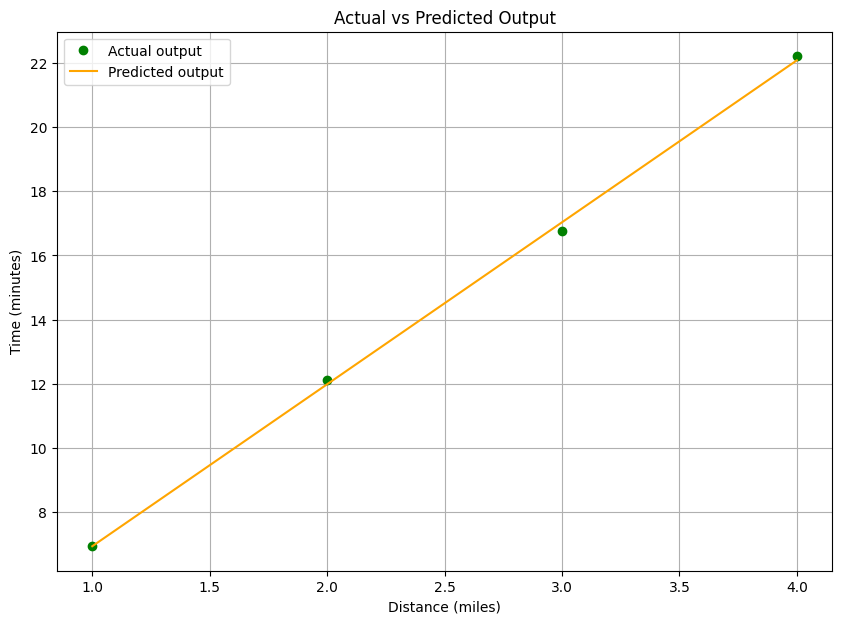

In [21]:
# Stage 4: Training

# Visualize training results

plot_results(
    model,
    distances_tensor,   # input tensor
    delivery_times_tensor   # output tensor
)

In [ ]:
# Inference
# Usually comes after training and evaluation stages for a robust model

distance_to_predict = 7.0

with torch.no_grad(): # disable gradient calculation for inference to make calculations more efficient
    # Convert input to tensor that matches model input shape 
    # 2D tensor like input tensor
    new_input_tensor = torch.tensor(
        [
            [distance_to_predict]
        ], 
        dtype=torch.float32
    )

    # Pass new input to the trained model to get prediction
    predicted_output_tensor = model(new_input_tensor)   # predicted delivery time

    # Post-inference processing
    # Extract scalar value from tensor for easier interpretation using .item()
    print(f"Prediction for delivery distance of {distance_to_predict} miles: {predicted_output_tensor.item():.1f} minutes")

    # Final decisioning logic to make final prediction or recommendation
    if predicted_output_tensor.item() < 30.0:
        print("Delivery can be made within 30 minutes.")
    else:
        print("Delivery will take longer than 30 minutes.")

Prediction for delivery distance of 7.0 miles: 37.2 minutes


In [18]:
# Post-Inference Analysis

# Inspect model's parameters and learning

# Access first layer in sequential model, which is the only layer in linear model
layer = model[0]

# Get layer's parameters
weights = layer.weight.data.numpy()
bias = layer.bias.data.numpy()

print(f"layer: {layer}")
print(f"weights: {weights}")    # output: ~5.0
print(f"bias: {bias}")  # output: ~2.0

###
# Analysis
# Given the linear model structure (y = Wx + b), the weights and bias represent the learned relationship between distance and delivery time
# Delivery Time = 5.0 * Distance + 2.0
# The weight indicates how much the delivery time increases for each additional mile biked, while the bias represents the base delivery time when the distance is zero.
###


layer: Linear(in_features=1, out_features=1, bias=True)
weights: [[5.0476723]]
bias: [1.8903826]


Loss on new complex data: 175.57652282714844


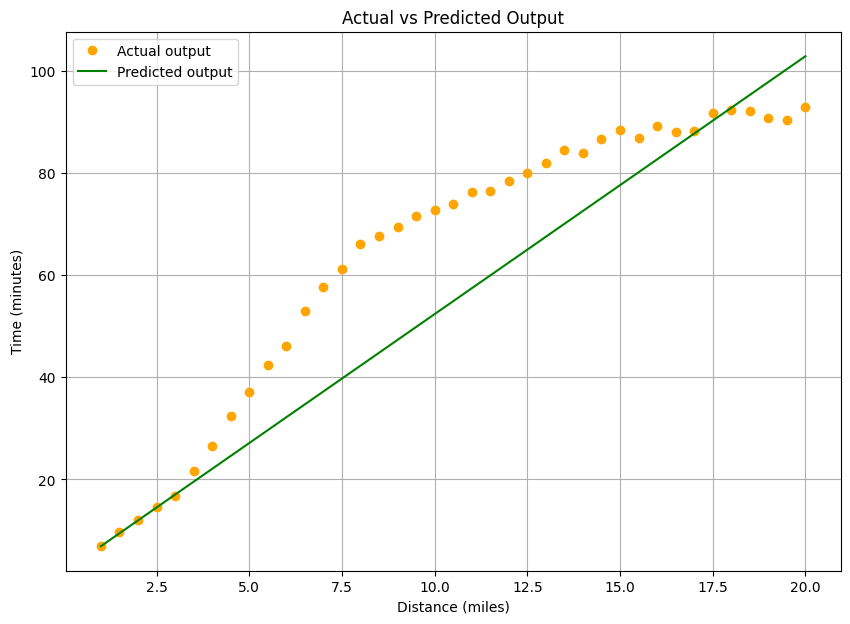

In [ ]:
# Additional testing

# Using More Complex Data

# Combined dataset: bikes for short distances, cars for longer ones
new_distances_tensor = torch.tensor([
    [1.0], [1.5], [2.0], [2.5], [3.0], [3.5], [4.0], [4.5], [5.0], [5.5],
    [6.0], [6.5], [7.0], [7.5], [8.0], [8.5], [9.0], [9.5], [10.0], [10.5],
    [11.0], [11.5], [12.0], [12.5], [13.0], [13.5], [14.0], [14.5], [15.0], [15.5],
    [16.0], [16.5], [17.0], [17.5], [18.0], [18.5], [19.0], [19.5], [20.0]
], dtype=torch.float32)

# Corresponding delivery times in minutes
new_times_tensor = torch.tensor([
    [6.96], [9.67], [12.11], [14.56], [16.77], [21.7], [26.52], [32.47], [37.15], [42.35],
    [46.1], [52.98], [57.76], [61.29], [66.15], [67.63], [69.45], [71.57], [72.8], [73.88],
    [76.34], [76.38], [78.34], [80.07], [81.86], [84.45], [83.98], [86.55], [88.33], [86.83],
    [89.24], [88.11], [88.16], [91.77], [92.27], [92.13], [90.73], [90.39], [92.98]
], dtype=torch.float32)

# Inference using trained model and new data
with torch.no_grad():
    new_predicted_times_tensor = model(new_distances_tensor)

# Calculate loss on new data to evaluate model performance
new_loss = loss_function(
    new_predicted_times_tensor,
    new_times_tensor
)
print(f"Loss on new complex data: {new_loss.item()}")

# Loss is too high at ~175

# Plot results
plot_results(
    model,
    new_distances_tensor,
    new_times_tensor
)
# visualization shows that the linear model doesn't fit the more complex data, which is more nonlinear



In [ ]:
# Stage 5: Evaluation

# Evaluate:
# Model performance
# Loss function performance
# Overfitting, underfitting...

# Retrain model based on evaluation

# Stage 6: Testing
# Test on unseen data to prevent leakage from training data

Nonlinear Modeling

Activation functions
Great explanations and illustrations: https://learn.deeplearning.ai/specializations/pytorch-for-deep-learning-professional-certificate/lesson/hllrjryf/activation-functions

